In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import confusion_matrix, classification_report, f1_score, r2_score
from sklearn.metrics import accuracy_score

import joblib

In [93]:
path = '/Volumes/Macbook Drive/Projects/Internshala_Accredia/Fraud.csv'
df = pd.read_csv(path)
df.head(4)

step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT  9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT  1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER   181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT   181.00   C840083671          181.0            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0

In [60]:
path2 = '/Volumes/Macbook Drive/Projects/Internshala_Accredia/rdata.csv'
rd = pd.read_csv(path2)

# Basics Analysing Dataset

In [61]:
rd.shape

(1908786, 11)

In [62]:
df.size

69988820

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Spliting Dataset In Objects and Integer/float

In [65]:
char = df.select_dtypes(['object'])
num = df.select_dtypes(['int64', 'float64'])

In [66]:
char

type     nameOrig     nameDest
0         PAYMENT  C1231006815  M1979787155
1         PAYMENT  C1666544295  M2044282225
2        TRANSFER  C1305486145   C553264065
3        CASH_OUT   C840083671    C38997010
4         PAYMENT  C2048537720  M1230701703
...           ...          ...          ...
6362615  CASH_OUT   C786484425   C776919290
6362616  TRANSFER  C1529008245  C1881841831
6362617  CASH_OUT  C1162922333  C1365125890
6362618  TRANSFER  C1685995037  C2080388513
6362619  CASH_OUT  C1280323807   C873221189

[6362620 rows x 3 columns]

In [67]:
num

step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     9839.64      170136.00       160296.36            0.00   
1           1     1864.28       21249.00        19384.72            0.00   
2           1      181.00         181.00            0.00            0.00   
3           1      181.00         181.00            0.00        21182.00   
4           1    11668.14       41554.00        29885.86            0.00   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13            0.00            0.00   
6362616   743  6311409.28     6311409.28            0.00            0.00   
6362617   743  6311409.28     6311409.28            0.00        68488.84   
6362618   743   850002.52      850002.52            0.00            0.00   
6362619   743   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFraud  isFlaggedFraud  
0                  0.00        0               0  
1                  0.00        0               0  
2                  0.00        1               0  
3                  0.00        1               0  
4                  0.00        0               0  
...                 ...      ...             ...  
6362615       339682.13        1               0  
6362616            0.00        1               0  
6362617      6379898.11        1               0  
6362618            0.00        1               0  
6362619      7360101.63        1               0  

[6362620 rows x 8 columns]

Finding NULL Values In Dataset

In [68]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Analysing Datset Columns To Understand Dataset

In [69]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [70]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [71]:
df['step'].nunique()

743

In [72]:
df['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [73]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [74]:
df.sample()

step     type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2289827   187  CASH_IN  273612.06  C1844934483        25080.0       298692.06   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
2289827  C1146358544             0.0             0.0        0               0

In [75]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

In [76]:
df.head(3)

step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT  9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT  1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER   181.00  C1305486145          181.0            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0

In [26]:
report = ProfileReport(df,title = 'Fraud Detection Dataset Report',explorative=True)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Visualisating The Dataset To Get Insights :)

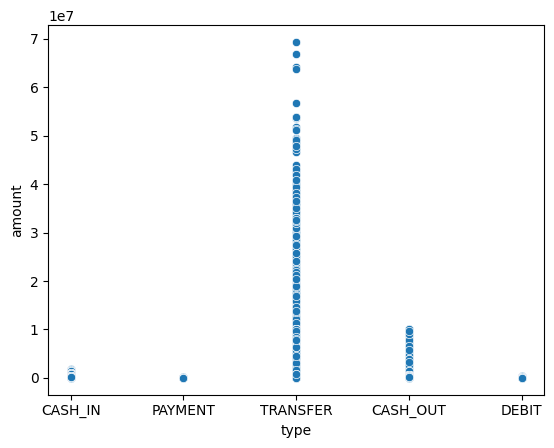

In [77]:
sns.scatterplot(data=rd, x = 'type', y = 'amount')
plt.show()

In [78]:
df[df['type'] == 'PAYMENT']

step     type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1  PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1           1  PAYMENT   1864.28  C1666544295        21249.0        19384.72   
4           1  PAYMENT  11668.14  C2048537720        41554.0        29885.86   
5           1  PAYMENT   7817.71    C90045638        53860.0        46042.29   
6           1  PAYMENT   7107.77   C154988899       183195.0       176087.23   
...       ...      ...       ...          ...            ...             ...   
6362312   718  PAYMENT   8178.01  C1213413071        11742.0         3563.99   
6362314   718  PAYMENT  17841.23  C1045048098        10182.0            0.00   
6362316   718  PAYMENT   1022.91  C1203084509           12.0            0.00   
6362318   718  PAYMENT   4109.57   C673558958         5521.0         1411.43   
6362319   718  PAYMENT   8634.29   C642813806       518802.0       510167.71   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0        M1979787155             0.0             0.0        0               0  
1        M2044282225             0.0             0.0        0               0  
4        M1230701703             0.0             0.0        0               0  
5         M573487274             0.0             0.0        0               0  
6         M408069119             0.0             0.0        0               0  
...              ...             ...             ...      ...             ...  
6362312  M1112540487             0.0             0.0        0               0  
6362314  M1878955882             0.0             0.0        0               0  
6362316   M675916850             0.0             0.0        0               0  
6362318  M1126011651             0.0             0.0        0               0  
6362319   M747723689             0.0             0.0        0               0  

[2151495 rows x 11 columns]

In [79]:
df[df['amount'] > 10000]

step      type      amount     nameOrig  oldbalanceOrg  \
4           1   PAYMENT    11668.14  C2048537720       41554.00   
13          1   PAYMENT    11633.76  C1716932897       10127.00   
15          1  CASH_OUT   229133.94   C905080434       15325.00   
19          1  TRANSFER   215310.30  C1670993182         705.00   
24          1  TRANSFER   311685.89  C1984094095       10835.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
4              29885.86  M1230701703            0.00            0.00        0   
13                 0.00   M801569151            0.00            0.00        0   
15                 0.00   C476402209         5083.00        51513.44        0   
19                 0.00  C1100439041        22425.00            0.00        0   
24                 0.00   C932583850         6267.00      2719172.89        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
4                     0  
13                    0  
15                    0  
19                    0  
24                    0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[5076529 rows x 11 columns]

In [80]:
anlv1 = df[['type', 'amount', 'isFraud']]
anlv1

type      amount  isFraud
0         PAYMENT     9839.64        0
1         PAYMENT     1864.28        0
2        TRANSFER      181.00        1
3        CASH_OUT      181.00        1
4         PAYMENT    11668.14        0
...           ...         ...      ...
6362615  CASH_OUT   339682.13        1
6362616  TRANSFER  6311409.28        1
6362617  CASH_OUT  6311409.28        1
6362618  TRANSFER   850002.52        1
6362619  CASH_OUT   850002.52        1

[6362620 rows x 3 columns]

In [138]:
anlv2 = df.groupby('type')['amount'].mean()
anlv2

type
0    168920.242004
1    176273.964346
2      5483.665314
3     13057.604660
4    910647.009645
Name: amount, dtype: float64

/var/folders/z9/q6ssdpvx1yjg4kzqgvpg6ycm0000gn/T/ipykernel_22264/3085148114.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anlv2, palette=custom_palette)
/var/folders/z9/q6ssdpvx1yjg4kzqgvpg6ycm0000gn/T/ipykernel_22264/3085148114.py:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=anlv2, palette=custom_palette)


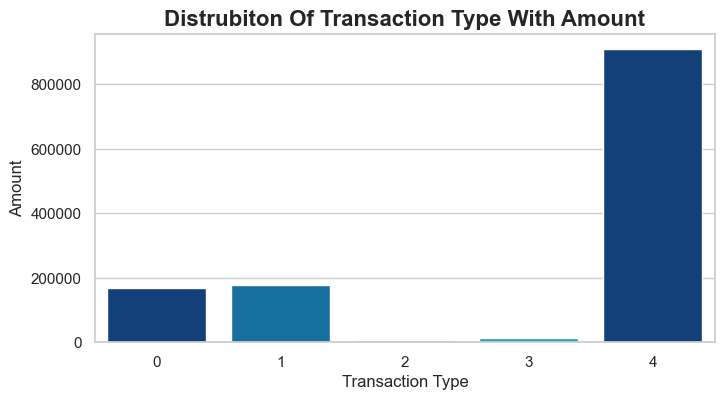

In [142]:
custom_palette = ["#023e8a", "#0077b6", "#0096c7", "#00b4d8"]
sns.set(style="whitegrid") 
plt.figure(figsize=(8, 4))  
sns.barplot(data=anlv2, palette=custom_palette)
plt.title('Distrubiton Of Transaction Type With Amount', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Amount', fontsize=12)

plt.show()


In [143]:
anlv3 = df[df['isFraud']==1].groupby('type').size()

/var/folders/z9/q6ssdpvx1yjg4kzqgvpg6ycm0000gn/T/ipykernel_22264/412591111.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anlv3.index, y=anlv3.values, palette=custom_palette)
/var/folders/z9/q6ssdpvx1yjg4kzqgvpg6ycm0000gn/T/ipykernel_22264/412591111.py:6: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(x=anlv3.index, y=anlv3.values, palette=custom_palette)


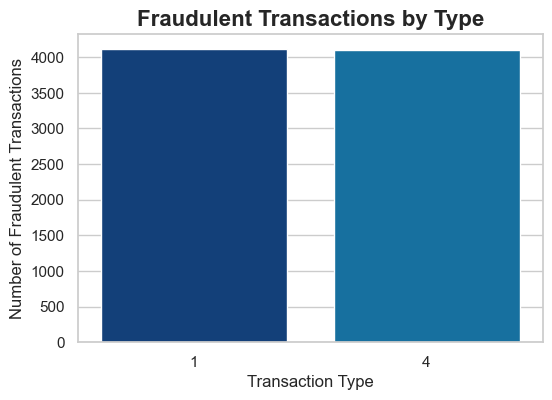

In [159]:
custom_palette = ["#023e8a", "#0077b6", "#0096c7", "#00b4d8"]

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

sns.barplot(x=anlv3.index, y=anlv3.values, palette=custom_palette)

plt.title('Fraudulent Transactions by Type', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)

plt.show()

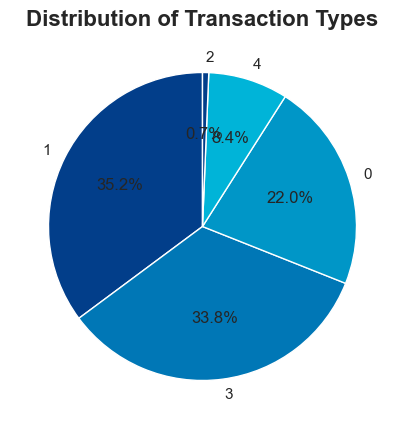

In [152]:
colors = ["#023e8a", "#0077b6", "#0096c7", "#00b4d8"]
plt.figure(figsize=(5, 5))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Distribution of Transaction Types', fontsize=16, fontweight='bold')
plt.ylabel('') 
plt.show()

In [84]:
df[df['isFlaggedFraud'] == 1]

step      type       amount     nameOrig  oldbalanceOrg  \
2736446   212  TRANSFER   4953893.08   C728984460     4953893.08   
3247297   250  TRANSFER   1343002.08  C1100582606     1343002.08   
3760288   279  TRANSFER    536624.41  C1035541766      536624.41   
5563713   387  TRANSFER   4892193.09   C908544136     4892193.09   
5996407   425  TRANSFER  10000000.00   C689608084    19585040.37   
5996409   425  TRANSFER   9585040.37   C452586515    19585040.37   
6168499   554  TRANSFER   3576297.10   C193696150     3576297.10   
6205439   586  TRANSFER    353874.22  C1684585475      353874.22   
6266413   617  TRANSFER   2542664.27   C786455622     2542664.27   
6281482   646  TRANSFER  10000000.00    C19004745    10399045.08   
6281484   646  TRANSFER    399045.08   C724693370    10399045.08   
6296014   671  TRANSFER   3441041.46   C917414431     3441041.46   
6351225   702  TRANSFER   3171085.59  C1892216157     3171085.59   
6362460   730  TRANSFER  10000000.00  C2140038573    17316255.05   
6362462   730  TRANSFER   7316255.05  C1869569059    17316255.05   
6362584   741  TRANSFER   5674547.89   C992223106     5674547.89   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
2736446      4953893.08   C639921569             0.0             0.0        1   
3247297      1343002.08  C1147517658             0.0             0.0        1   
3760288       536624.41  C1100697970             0.0             0.0        1   
5563713      4892193.09   C891140444             0.0             0.0        1   
5996407     19585040.37  C1392803603             0.0             0.0        1   
5996409     19585040.37  C1109166882             0.0             0.0        1   
6168499      3576297.10   C484597480             0.0             0.0        1   
6205439       353874.22  C1770418982             0.0             0.0        1   
6266413      2542664.27   C661958277             0.0             0.0        1   
6281482     10399045.08  C1806199534             0.0             0.0        1   
6281484     10399045.08  C1909486199             0.0             0.0        1   
6296014      3441041.46  C1082139865             0.0             0.0        1   
6351225      3171085.59  C1308068787             0.0             0.0        1   
6362460     17316255.05  C1395467927             0.0             0.0        1   
6362462     17316255.05  C1861208726             0.0             0.0        1   
6362584      5674547.89  C1366804249             0.0             0.0        1   

         isFlaggedFraud  
2736446               1  
3247297               1  
3760288               1  
5563713               1  
5996407               1  
5996409               1  
6168499               1  
6205439               1  
6266413               1  
6281482               1  
6281484               1  
6296014               1  
6351225               1  
6362460               1  
6362462               1  
6362584               1

In [154]:
anlv4 = df.groupby('isFraud')['amount'].mean()
anlv4

isFraud
0    1.781970e+05
1    1.467967e+06
Name: amount, dtype: float64

In [88]:
anlv5 = df[df['oldbalanceOrg'] > df['newbalanceOrig']]
anlv5

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[2874330 rows x 11 columns]

In [90]:
anlv6=df.groupby('amount')['isFraud'].sum()
anlv6

amount
0.00           16
0.01            0
0.02            0
0.03            0
0.04            0
               ..
69337316.27     0
69886731.30     0
71172480.42     0
73823490.36     0
92445516.64     0
Name: isFraud, Length: 5316900, dtype: int64

In [93]:
df.sample()

step     type   amount    nameOrig  oldbalanceOrg  newbalanceOrig  \
4786131   345  PAYMENT  27118.2  C461960784            0.0             0.0   

           nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
4786131  M569499616             0.0             0.0        0               0

In [94]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [95]:
cha1 = df[df['type'] == 'PAYMENT']['amount'].mean()
cha2 = df[df['type'] == 'TRANSFER']['amount'].mean()
cha3 = df[df['type'] == 'CASH_OUT']['amount'].mean()
cha4 = df[df['type'] == 'DEBIT']['amount'].mean()
cha5 = df[df['type'] == 'CASH_IN']['amount'].mean()

In [96]:
print(f'Average Amount Of Payment Type `PAYMENT`', cha1)
print(f'Average Amount Of Payment Type `TRANSFER`', cha1)
print(f'Average Amount Of Payment Type `CASH_OUT`', cha1)
print(f'Average Amount Of Payment Type `DEBIT`', cha1)
print(f'Average Amount Of Payment Type `CASH_IN`', cha1)

Average Amount Of Payment Type `PAYMENT` 13057.604660187455
Average Amount Of Payment Type `TRANSFER` 13057.604660187455
Average Amount Of Payment Type `CASH_OUT` 13057.604660187455
Average Amount Of Payment Type `DEBIT` 13057.604660187455
Average Amount Of Payment Type `CASH_IN` 13057.604660187455


In [101]:
findv1 = df['amount'].max()
findv2 = df['amount'].min()
findv3 = df['amount'].mean()
print(f'Heighest Amount:', findv1)
print(f'Lowest Amount:', findv2)
print(f'Average Amount:', findv3)

Heighest Amount: 92445516.64
Lowest Amount: 0.0
Average Amount: 179861.90354913071


Analysing The Dataset Columns.

In [4]:
df.sample()

step      type   amount    nameOrig  oldbalanceOrg  newbalanceOrig  \
2781895   214  CASH_OUT  2599.34  C901790823            0.0             0.0   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
2781895  C1543476938       136652.55       139251.89        0               0

In [94]:
#nameOrig Is Deleting Because while developing Machine Learning Model it doesn't effect the model, nameOrig have all unique values.
del df['nameOrig']
print('Column `nameOrig` is deleted from the dataset..!')

Column `nameOrig` is deleted from the dataset..!


In [6]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [7]:
df.groupby('isFraud')['isFlaggedFraud'].sum()

isFraud
0     0
1    16
Name: isFlaggedFraud, dtype: int64

In [95]:
# isFlaggedFraud Is Deleting Because doesn't correleated to isFraud column
del df['isFlaggedFraud']
print('Column `isFlaggedFraud` Is Deleted From The Dataset..!')

Column `isFlaggedFraud` Is Deleted From The Dataset..!


In [9]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
C1049862186      1
C2118381511      1
C2099952089      1
C1027984317      1
C1251365829      1
Name: count, Length: 2722362, dtype: int64

In [10]:
print(df.nameDest.unique())
df.nameDest.nunique()

['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


2722362

In [96]:
# Deleting nameDest Because does't effect's or contribute in the predication the model and giving high accuracy.
del df['nameDest']
print('Column `nameDest` Is Deleted From The Dataset..!')

Column `nameDest` Is Deleted From The Dataset..!


In [11]:
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
706        4
721        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

In [12]:
print(df.step.unique())
df.step.nunique()

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

743

In [97]:
# Not Correleated.
del df['step']
print('Column `step` is Deleted From The Dataset..! ')

Column `step` is Deleted From The Dataset..! 


In [14]:
df.head(3)

type   amount  oldbalanceOrg  newbalanceOrig     nameDest  \
0   PAYMENT  9839.64       170136.0       160296.36  M1979787155   
1   PAYMENT  1864.28        21249.0        19384.72  M2044282225   
2  TRANSFER   181.00          181.0            0.00   C553264065   

   oldbalanceDest  newbalanceDest  isFraud  
0             0.0             0.0        0  
1             0.0             0.0        0  
2             0.0             0.0        1

In [16]:
df.sample()

type   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
4872691  PAYMENT  9935.45            0.0             0.0             0.0   

         newbalanceDest  isFraud  
4872691             0.0        0

In [17]:
print(f'Shape Of The Dataset ->',df.shape)
print(f'Size Of The DataSet ->',df.size)

Shape Of The Dataset -> (6362620, 7)
Size Of The DataSet -> 44538340


Encoding The Columns.

In [108]:
encode = LabelEncoder()

In [109]:
df['type'] = encode.fit_transform(df['type'])

# Spliting The Dataset and Preparing The Dataset For Model.

In [20]:
X_input_data = df.iloc[:,:-1]
y_output_data = df.iloc[:,-1]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_input_data, 
                                                    y_output_data, 
                                                    test_size=0.2, 
                                                    random_state=42) 

I used KNeighborsClassifier Alogirithm Which I know it is Best For This Dataset To Predict Without Loosing Accuracy.

In [27]:
# Hyperparameter Will Used If The Accuracy Is Low.
fraud_model = KNeighborsClassifier()
fraud_model.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
X_train.shape

(5090096, 6)

In [24]:
X_test.shape

(1272524, 6)

In [132]:
fraud_model.score(X_test, y_test)*100

99.94499121431109

In [47]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
forest_model.score(X_test, y_test)*100

99.96943083195288

In [49]:
key_fea = forest_model.feature_importances_

In [50]:
key_fea_name = X_input_data.columns

In [52]:
key_fea_df = pd.DataFrame({
    'Feature': key_fea_name,
    'Importance': key_fea
})

In [53]:
key_fea_df

Feature  Importance
0            type    0.048577
1          amount    0.185815
2   oldbalanceOrg    0.306173
3  newbalanceOrig    0.025123
4  oldbalanceDest    0.078847
5  newbalanceDest    0.355465

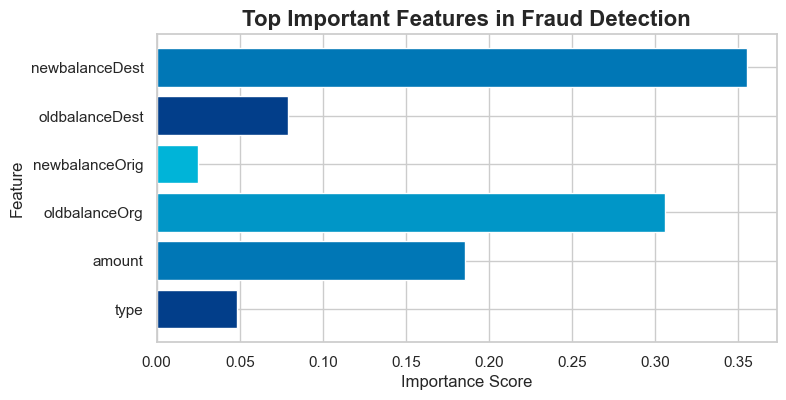

In [157]:
colors = ["#023e8a", "#0077b6", "#0096c7", "#00b4d8"]

plt.figure(figsize=(8, 4))
plt.barh(key_fea_df['Feature'], key_fea_df['Importance'], color=colors)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top Important Features in Fraud Detection', fontsize=16, fontweight='bold')

plt.show()

In [71]:
vif_data = pd.DataFrame()
vif_data['Feature_vif'] = X_input_data.columns
vif_data['VIF'] = [variance_inflation_factor(X_input_data.values, i) for i in range(X_input_data.shape[1])]
print(vif_data)
print('-------------------------------')
print(key_fea_df)


      Feature_vif         VIF
0            type    1.103462
1          amount    3.951284
2   oldbalanceOrg  468.475599
3  newbalanceOrig  469.934631
4  oldbalanceDest   70.597025
5  newbalanceDest   82.253969
-------------------------------
          Feature  Importance
0            type    0.048577
1          amount    0.185815
2   oldbalanceOrg    0.306173
3  newbalanceOrig    0.025123
4  oldbalanceDest    0.078847
5  newbalanceDest    0.355465


This Features Is >5 below 5 means it is safe to keep in ML Model

As we see `newbalanceOrig  469.934631` VIF,  `newbalanceOrig    0.025123` Random Forest Features imp this column is not important
And next feature is `oldbalanceDest   70.597025` VIF, oldbalanceDest    0.078847 Random Forest Features imp this column is not important
So on the base of this details  I'm removing this features.

In [99]:
# As we mentioned Above.
del df['newbalanceOrig']
print('Column newbalanceOrig Is Deleted From The Dataset..!' )

Column newbalanceOrig Is Deleted From The Dataset..!


In [100]:
# As we mentioned Above.
del df['oldbalanceDest']
print('Column oldbalanceDest Is Deleted From The Dataset..!' )

Column oldbalanceDest Is Deleted From The Dataset..!


In [101]:
df.sample()

type    amount  oldbalanceOrg  newbalanceDest  isFraud
1397395  PAYMENT  14377.28            0.0             0.0        0

In [112]:
X_new_input_data = df.iloc[:,:-1]
y_new_input_data = df.iloc[:, -1]

In [113]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new_input_data, y_new_input_data, test_size=0.2, random_state=42)

In [115]:
update_fraud_model = KNeighborsClassifier()
update_fraud_model.fit(X_new_train, y_new_train)

KNeighborsClassifier()

In [116]:
print(f'update fraud model test accuracy is:',update_fraud_model.score(X_new_test, y_new_test)*100)

update fraud model test accuracy is: 99.93571830472354


Got Great Accuracy In Fraud Detection Model. 99% Is Good, Next Classification Report Is Imp to Analysing the Model Sometime Model Overfit and train on specific data and predict wrong data this happens when data is Imblannced Dataset

# Evaulating The Model.

In [28]:
pred = fraud_model.predict(X_test)

In [32]:
F1_Score = f1_score(pred, y_test)
Accuracy_Score = accuracy_score(pred, y_test)
Report = classification_report(pred, y_test)
Confusion_Matrix = confusion_matrix(pred, y_test)
R2_score = r2_score(pred, y_test)

In [91]:
print(f'F1 Score:',F1_Score)
print('----------------------------------------')
print(f'Accuracy Score:',Accuracy_Score)
print('----------------------------------------')
print(f'Classification Report\n',Report)
print('----------------------------------------')
print(f'R2 Score', R2_score)
print('----------------------------------------')
print(f'Confusion Matrix\n',Confusion_Matrix)

F1 Score: 0.7619047619047619
----------------------------------------
Accuracy Score: 0.9994499121431109
----------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271204
           1       0.69      0.85      0.76      1320

    accuracy                           1.00   1272524
   macro avg       0.85      0.92      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524

----------------------------------------
R2 Score 0.46914631063674017
----------------------------------------
Confusion Matrix
 [[1270704     500]
 [    200    1120]]


Report Is almost perfect but Precision score report is 69% in 1. To enchance the Precision score SMOTE Method will used for Imbalanced dataset.

Update Model Evaulation Score

In [117]:
y_pred = update_fraud_model.predict(X_new_test)

In [118]:
F1_Score_update = f1_score(pred, y_test)
Accuracy_Score_update = accuracy_score(pred, y_test)
Report_update = classification_report(pred, y_test)
Confusion_Matrix_update = confusion_matrix(pred, y_test)
R2_score_update = r2_score(pred, y_test)

In [119]:
print(f'F1 Score_Updated:',F1_Score_update)
print('----------------------------------------')
print(f'Accuracy Score_Updated:',Accuracy_Score_update)
print('----------------------------------------')
print(f'Classification Report_Updated\n',Report_update)
print('----------------------------------------')
print(f'R2 Score_Updated', R2_score_update)
print('----------------------------------------')
print(f'Confusion Matrix_Updated\n',Confusion_Matrix_update)

F1 Score_Updated: 0.7619047619047619
----------------------------------------
Accuracy Score_Updated: 0.9994499121431109
----------------------------------------
Classification Report_Updated
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1271204
           1       0.69      0.85      0.76      1320

    accuracy                           1.00   1272524
   macro avg       0.85      0.92      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524

----------------------------------------
R2 Score_Updated 0.46914631063674017
----------------------------------------
Confusion Matrix_Updated
 [[1270704     500]
 [    200    1120]]


Everything is same means removing 2 features is doesn't affect the Model Accuracy and performance.

In [120]:
joblib.dump(encode, 'type_encoder')
joblib.dump(update_fraud_model, 'fraud_detect_model')

['fraud_detect_model']

We can Further Enchance the Model and make better.